axes
boots
carabiners
crampons
gloves
hardshell_jackets
harnesses
helmets
insulated_jackets
pulleys
rope
tents


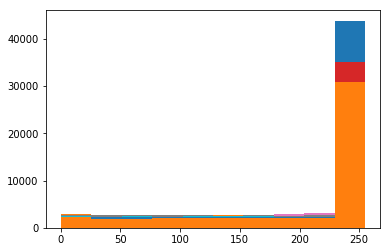

In [21]:
import os
import numpy as np
from PIL import Image, ImageOps
from shutil import copyfile
import matplotlib.pyplot as plt

f = []
path ="C:/Users/rfernandez3/Documents/OpenHack/gear_images/"
path_destination=path.replace('gear_images','gear_imagesmod')
try:
    os.stat(path_destination)
except:
    os.mkdir(path_destination)     

listOfDirs = os.listdir(path)
for l in listOfDirs:
    print(l)
    listOfFiles = os.listdir(str(path)+str(l))
    try:
        os.stat(path_destination+l+'/')
    except:
        os.mkdir(path_destination+l+'/')  
    for lf in listOfFiles:
        original_image=Image.open(path+l+'/'+lf).convert('RGB')
        width,height=original_image.size
        if(width!=height):
            num=max(width, height)
            a4im = Image.new('RGB',
                             (num, num),  
                             (255, 255, 255))  # White
            try:
                a4im.paste(original_image, original_image.getbbox())  # Not centered, top-left corner
            except:
                print(path+l+'/'+lf)
            
            
            imgpad=a4im
        else:
            imgpad=original_image
        imgresized=imgpad.resize((128,128),Image.NEAREST)
        imgnp = np.asarray(imgresized)
        #plt.imshow(imgnp)
        #plt.hist(imgnp.ravel())
        img_pil = Image.fromarray(np.uint8(imgnp))
        img_pil = ImageOps.equalize(img_pil)
       # plt.imshow(img_pil)
        img2 = np.asarray(img_pil)
        plt.hist(img2.ravel())
        break
        #imgresized.save(path_destination+l+'/'+lf, 'JPEG', quality=100)